In [1]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit

In [2]:
dt  = 0.1
T  = 10
N  = int(T/dt)
ta  = np.zeros(N,float)

In [3]:
# First setting F(t) = 0 (no randomisation) and solving basic ODE analytically
# Plotting Analytical Solution

# Initial Conditions
u0    = 10                                   # initial velocity at t=0
g     = 3                                    # value of gamma
x0    = 0
for i in range(1,N):
    ta[i] = ta[i-1] + dt

# Solution
xa = u0*(1 - np.exp(-g*ta))/g + x0       # analytical soln of position
va = u0*np.exp(-g*ta)                     # analytical soln of velocity

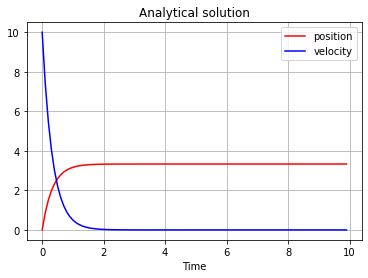

In [4]:
# Plotting the analytical solution
plt.plot(ta,xa, color='red', label='position')
plt.plot(ta,va, color='blue', label='velocity')

# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

plt.grid()
plt.title("Analytical solution")
plt.xlabel("Time")
plt.legend()
plt.show()

### Solving ODE using Euler-Cromer Method

In [5]:
# Creating function for acceleration
def a(x,v,g):
    return 0*x -v*g

In [6]:
# Declaring arrays
te = np.zeros(N, float)
xe = np.zeros(N, float)
ve = np.zeros(N, float)

# Initial conditions
te[0] = 0
xe[0] = x0
ve[0] = u0

In [7]:
# Euler-Cromer Integration algorithm
for i in range(1,N):
    te[i] = te[i-1] + dt
    xe[i] = xe[i-1] + ve[i-1]*dt
    ve[i] = ve[i-1] + a(0,ve[i-1], g)*dt

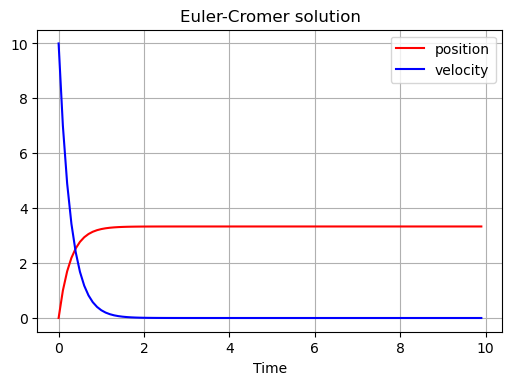

In [8]:
# Plotting Euler-Cromer Solution
plt.plot(te,xe, color='red', label='position')
plt.plot(te,ve, color='blue', label='velocity')
# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

plt.grid()
plt.title("Euler-Cromer solution")
plt.xlabel("Time")
plt.legend()
plt.show()

### Solving ODE using Leapfrog method 

In [9]:
def leapfrog(Xin, Vin, Tf, dt, F):
    N = int(Tf/dt)
    X = np.zeros(N, float)
    V = np.zeros(N, float)
    T = np.zeros(N, float)
    
    X[0] = Xin
    V[0] = (dt/2)*a(X[0], Vin, g)
    
    for n in range (1, N):
        T[n] = n*dt
        X[n] = X[n-1] + V[n-1]*dt
        V[n] = V[n-1] + a(X[n], V[n-1], g)*dt
    
    return T, X, V

In [10]:
# Declaring arrays
tl = np.zeros(N, float)
xl = np.zeros(N, float)
vl = np.zeros(N, float)

tl,xl,vl = leapfrog(x0, u0, T, dt, 0)     # u0+ a(0,vl[0],g)*dt/2

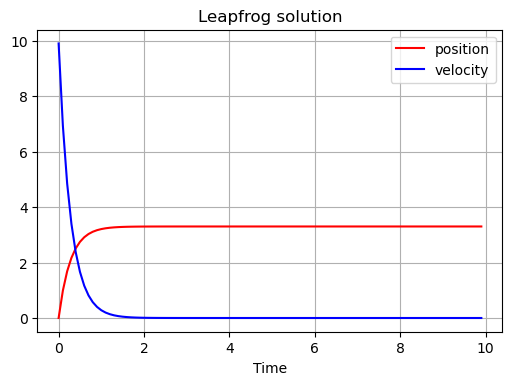

In [11]:
# Plotting Leapfrog Solution
plt.plot(tl,-6.6*xl, color='red', label='position')
plt.plot(tl,-6.6*vl, color='blue', label='velocity')

# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

plt.grid()
plt.title("Leapfrog solution")
plt.xlabel("Time")
plt.legend()
plt.show()

### Solving ODE using RK4 method

In [12]:
# Defining RK4 function

def rk4(Xin, Vin, Tf, dt,g):
    N = int(Tf/dt)
    X = np.zeros(N+1, float)
    V = np.zeros(N+1, float)
    T = np.zeros(N+1, float)
   
    X[0] = Xin
    V[0] = Vin
   
    for n in range (1, N+1):
        T[n] = n*dt
        x0 = X[n-1]
        v0 = V[n-1]
        h = dt
       
        k1x = v0
        k1v = a(x0, v0, g)
        k2x = v0 + (k1v*h/2)
        k2v = a((x0 + (k1x*h/2)), (v0 + (k1v*h/2)), g)
        k3x = v0 + (k2v*h/2)
        k3v = a((x0 + (k2x*h/2)), (v0 + (k2v*h/2)), g)
        k4x = v0 + (k3v*h)
        k4v = a(x0 + (k3x*h), v0 + (k3v*h), g)
       
        X[n] = x0 + (dt*(k1x + 2*k2x + 2*k3x + k4x)/6)
        V[n] = v0 + (dt*(k1v + 2*k2v + 2*k3v + k4v)/6)
    return T, X, V

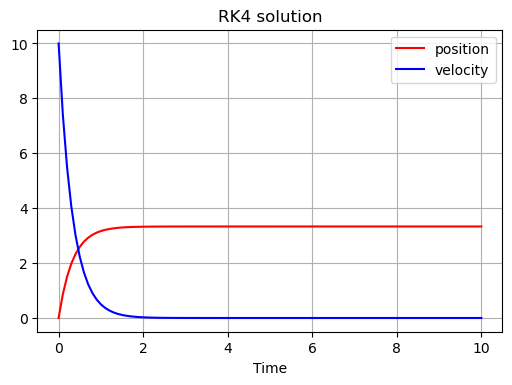

In [13]:
tk,xk,vk = rk4(x0,u0,T,dt,g)

# Plotting RK4 Solution
plt.grid()
plt.plot(tk,xk,color='red', label='position')
plt.plot(tk,vk,color='blue', label='velocity')


# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

plt.title("RK4 solution")
plt.xlabel("Time")
plt.legend()
plt.show()

### Plotting all solutions on one graph

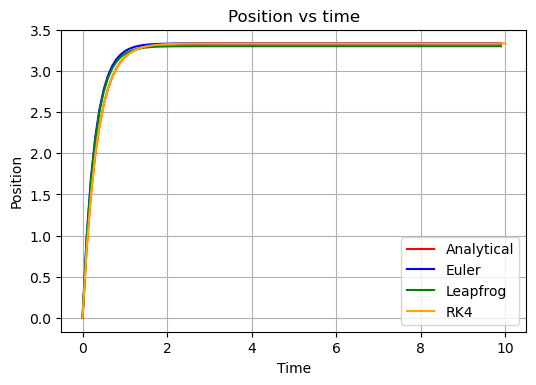

In [15]:
plt.plot(ta,xa, color="red", label="Analytical")
plt.plot(te,xe, color="blue", label="Euler")
plt.plot(tl,-6.6*xl, color="green", label="Leapfrog")
plt.plot(tk,xk, color="orange", label="RK4")

# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'


plt.title("Position vs time")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()

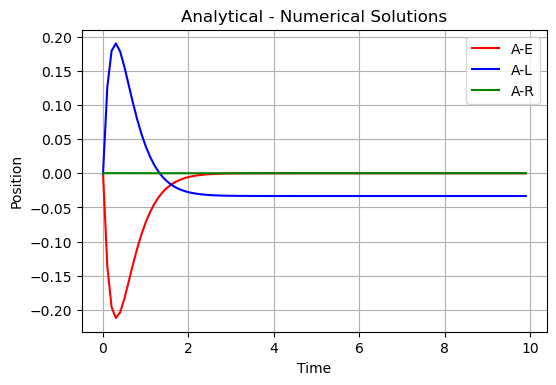

In [25]:
# Plotting the differences between analytical and other methods

# Need to take out last value of xk since the size is 1 more than analytical solution
xk_100 = np.empty(len(xk)-1, float)
for i in range(len(xk_100)):
    xk_100[i] = xk[i]
    
# Now we plot
plt.plot(ta,(xa-xe), color="red", label="A-E")
plt.plot(te,(-6.6*xl-xa), color="blue", label="A-L")
#plt.plot(te, xe-xl)
#print(len(xk))
plt.plot(te,(xa-xk_100), color="green", label="A-R")


# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

plt.title("Analytical - Numerical Solutions")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()

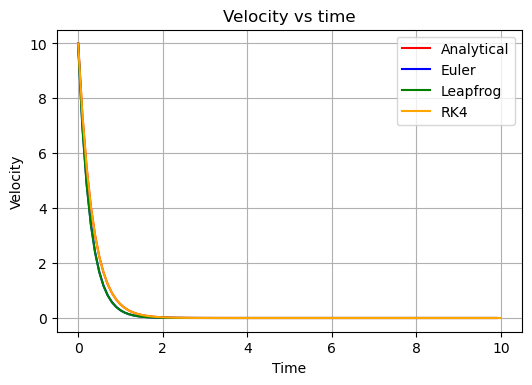

In [17]:
plt.plot(ta,va, color="red", label="Analytical")
plt.plot(te,ve, color="blue", label="Euler")
plt.plot(tl,-6.6*vl, color="green", label="Leapfrog")
plt.plot(tk,vk, color="orange", label="RK4")
plt.title("Velocity vs time")

# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.show()

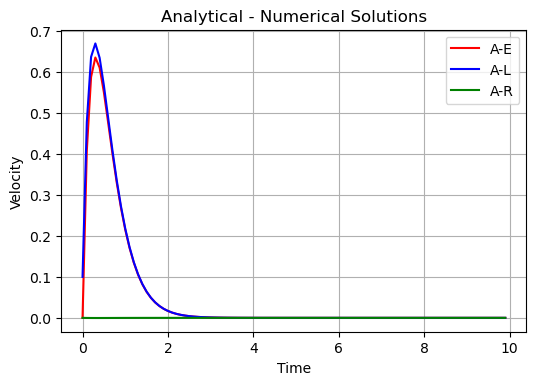

In [32]:
# Plotting the differences between analytical and other methods

# Need to take out last value of vk since the size is 1 more than analytical solution
vk_100 = np.empty(len(vk)-1, float)
for i in range(len(vk) - 1):
    vk_100[i] = vk[i]
    
# Now we plot
plt.plot(ta,(va-ve), color="red", label="A-E")
plt.plot(te,(va+(6.6*vl)), color="blue", label="A-L")
plt.plot(tl,(va-vk_100), color="green", label="A-R")


# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'


plt.title("Analytical - Numerical Solutions")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.show()

### Now introducing randomness for the brownian motion

In [320]:
import random as rd

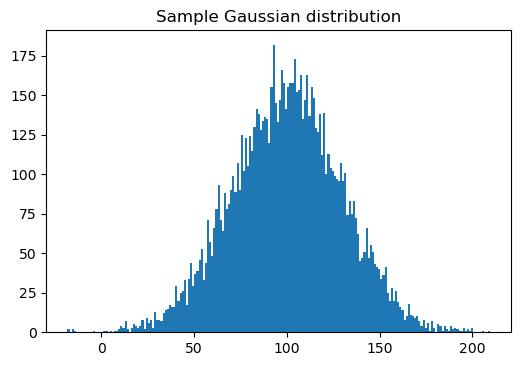

In [321]:
# Gaussian Distribution (for testing)

# store the random numbers in a numpy array
gauss1 = np.zeros(10000, float) 
mu1 = 100
sigma1 = 30

# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'
    
for i in range(len(gauss1)): 
    temp1 = rd.gauss(mu1, sigma1) 
    gauss1[i] = temp1  
        
# plotting a graph 
plt.hist(gauss1, bins = 200) 
plt.title("Sample Gaussian distribution")
plt.show()

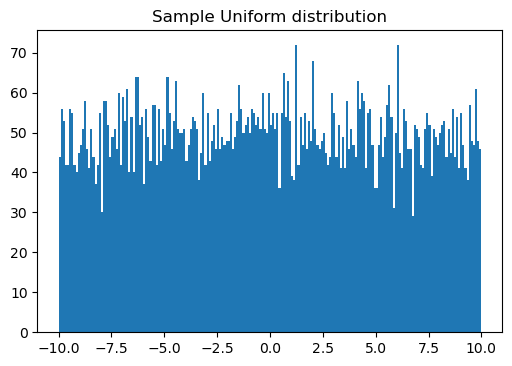

In [322]:
# Uniform distibution (for testing)

unif1 = np.random.uniform(-10,10,size = 10000)

# Plot histogram
# Code to set plot dpi to 100 and background to white
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

plt.hist(unif1, bins = 200) 
plt.title("Sample Uniform distribution")
plt.show()